In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
import cv2

In [33]:
testImage = cv2.imread("sentinel-3b.2021269.0926.1543C.L3.SF3.v950V20193_1_2_x0-2.rbd_rhos.swfl.filt.tif") # Reads image as uint8 array / tensor

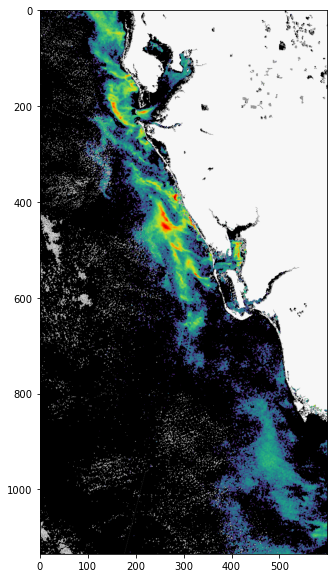

In [5]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(testImage, cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
print(testImage)

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [247 247 247]
  [247 247 247]
  [247 247 247]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [247 247 247]
  [247 247 247]
  [247 247 247]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [247 247 247]
  [247 247 247]
  [247 247 247]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [141  99  50]]]


In [7]:
testImage.dtype

dtype('uint8')

In [8]:
testImage.shape # height, width, layers

(1135, 600, 3)

In [9]:
upper = 100 
lower = 600
left = 100
right = 600

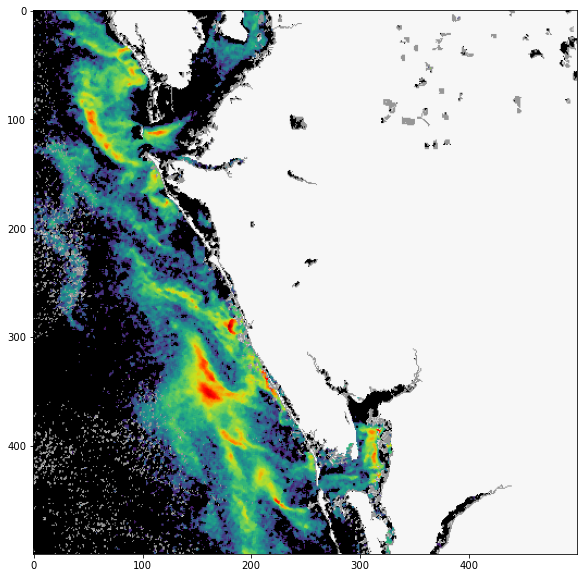

In [10]:
crop_imageTest = testImage[upper:lower, left:right, :]
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(crop_imageTest, cv2.COLOR_BGR2RGB))
plt.show()

In [11]:
# Test using original image without crop

img = cv2.cvtColor(testImage, cv2.COLOR_BGR2RGB)

In [12]:
vectorized = img.reshape((-1,3))

In [13]:
vectorized = np.float32(vectorized)

In [14]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

In [20]:
K = 10
attempts = 10
ret, label, center = cv2.kmeans(vectorized, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)

In [21]:
center = np.uint8(center)

In [22]:
res = center[label.flatten()]
result_image = res.reshape((img.shape))

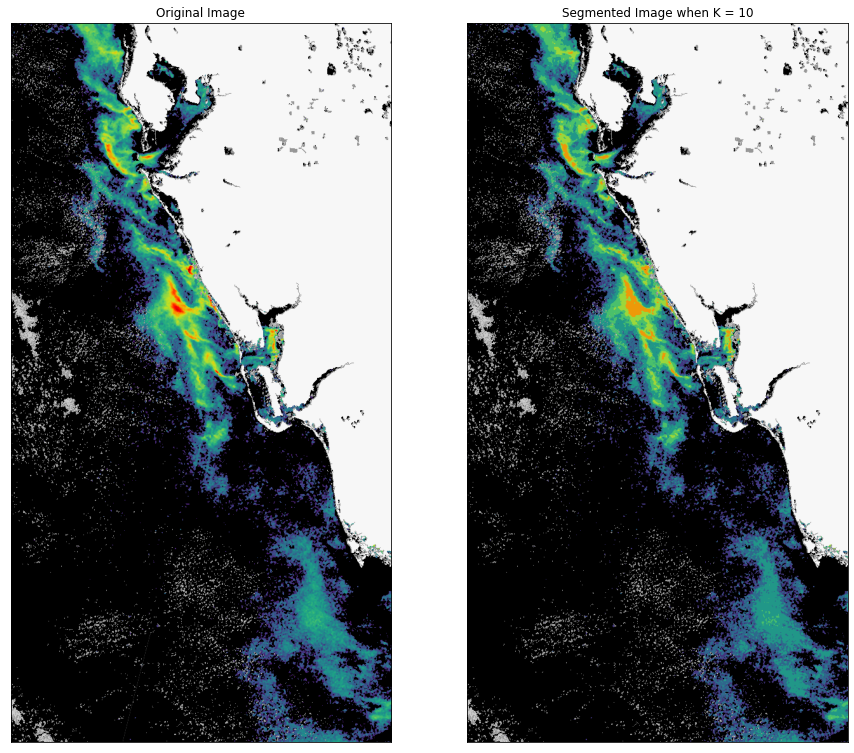

In [23]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

In [25]:
print(label)

[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [5]]


In [34]:
redCopy = testImage.copy()

In [35]:
redlayer = redCopy[:,:,2]

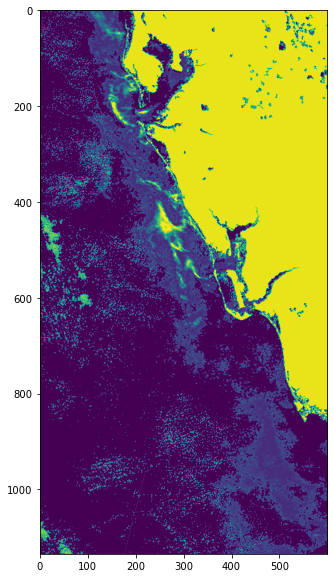

In [37]:
plt.figure(figsize=(10,10))
plt.imshow(redlayer)
plt.show()